In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-whitegrid',
              {'xaxis.labellocation': 'right',
               'legend.frameon': True,
               'legend.facecolor': 'white'}])

## 2 - More on models and model description

This chapter will focus on the "mini-language" used to describe models in S-timator and also on the model objects created by function `read_model()`

In [29]:
import stimator as st

Picking up the last example from the previous chapter: the _open two-enzyme system_:

![Example: a two-reaction open chemical system](images/2chem_open.png)

Recall that the minimum components of a model declaration are:

- title
- reactions
- parameters
- init

In [30]:
model_description = """
title An open two-reaction chemical system

inflow: -> A, rate = kin
r1: A -> B, rate = k1 * A
r2: B -> C, rate = k2 * B - k3 * C
outflow: C ->, rate = kout * C

kin = 0.5
k1 = 0.1
k2 = 2
k3 = 1
kout = 0.2

init: (A = 0, B = 0, C = 0)
"""

m = st.read_model(model_description)
print(m)

An open two-reaction chemical system

Variables: A B C

inflow:
  reagents: []
  products: [('A', 1.0)]
  stoichiometry: ->  A
  rate = kin

r1:
  reagents: [('A', 1.0)]
  products: [('B', 1.0)]
  stoichiometry: A ->  B
  rate = k1 * A

r2:
  reagents: [('B', 1.0)]
  products: [('C', 1.0)]
  stoichiometry: B ->  C
  rate = k2 * B - k3 * C

outflow:
  reagents: [('C', 1.0)]
  products: []
  stoichiometry: C ->
  rate = kout * C

init: (A = 0.0, B = 0.0, C = 0.0)

kin = 0.5
k1 = 0.1
k2 = 2
k3 = 1
kout = 0.2

timecourses: {'filenames': []}


### 2.1 - Reactions

You can iterate over the reactions of a model:

In [31]:
for v in m.reactions:
    print (v)

inflow:
  reagents: []
  products: [('A', 1.0)]
  stoichiometry: ->  A
  rate = kin

r1:
  reagents: [('A', 1.0)]
  products: [('B', 1.0)]
  stoichiometry: A ->  B
  rate = k1 * A

r2:
  reagents: [('B', 1.0)]
  products: [('C', 1.0)]
  stoichiometry: B ->  C
  rate = k2 * B - k3 * C

outflow:
  reagents: [('C', 1.0)]
  products: []
  stoichiometry: C ->
  rate = kout * C



Or, just to get the names:

In [32]:
for v in m.reactions:
    print (v.name)

inflow
r1
r2
outflow


A reaction has a lot of attributes:

In [33]:
v = m.reactions.r1
print (v.name)
print (v.reagents)
print (v.products)
print (v.stoichiometry_string)
print (v.stoichiometry)
print (v())

r1
[('A', 1.0)]
[('B', 1.0)]
A ->  B
[('A', -1.0), ('B', 1.0)]
k1 * A


`Model.varnames` is a list of variable names and `Model.parameters` can be used to iterate over the parameters of a model.

In [34]:
print (m.varnames)
for p in m.parameters:
    print ('%6s = %g' % (p.name, p))

['A', 'B', 'C']
   kin = 0.5
    k1 = 0.1
    k2 = 2
    k3 = 1
  kout = 0.2


### 2.2 - Transformations

Transformations are declared starting a line with a `~`. These are quantities that vary over time but are not decribed by differential equations. In this example `total` is a transformation.

In [35]:
model_description = """
title An open two-reaction chemical system

inflow: -> A, rate = kin
r1: A -> B, rate = k1 * A
r2: B -> C, rate = k2 * B - k3 * C
outflow: C ->, rate = kout * C

kin = 0.5
k1 = 0.1
k2 = 2
k3 = 1
kout = 0.2

init: (A = 0, B = 0, C = 0)

~ total = A + B + C
"""

m = st.read_model(model_description)
print(m)

An open two-reaction chemical system

Variables: A B C

inflow:
  reagents: []
  products: [('A', 1.0)]
  stoichiometry: ->  A
  rate = kin

r1:
  reagents: [('A', 1.0)]
  products: [('B', 1.0)]
  stoichiometry: A ->  B
  rate = k1 * A

r2:
  reagents: [('B', 1.0)]
  products: [('C', 1.0)]
  stoichiometry: B ->  C
  rate = k2 * B - k3 * C

outflow:
  reagents: [('C', 1.0)]
  products: []
  stoichiometry: C ->
  rate = kout * C

total:
  rate = A + B + C

init: (A = 0.0, B = 0.0, C = 0.0)

kin = 0.5
k1 = 0.1
k2 = 2
k3 = 1
kout = 0.2

timecourses: {'filenames': []}


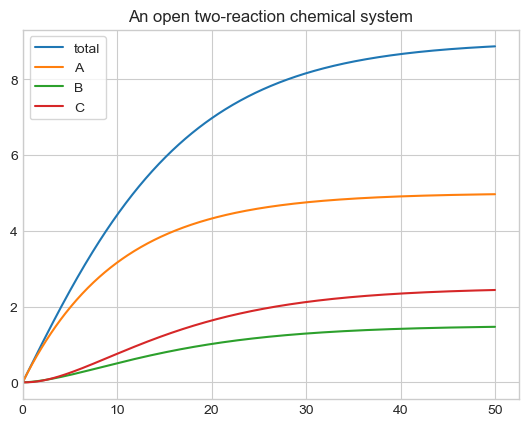

In [36]:
m.solve(tf=50.0, outputs=["total", 'A', 'B', 'C']).plot();

### 2.3 - Local parameters in processes

Parameters can also "belong", that is, being local, to processes. 

In this example, both `r1` and `r2` have local parameters

Notice how thes paraemters are listed and refered to in `print m`:

In [37]:
model_description = """
title An open two-reaction chemical system

inflow: -> A, rate = kin
r1: A -> B, rate = k * A, k = 0.1
r2: B -> C, rate = kf * B - kr * C, kf = 2, kr = 1
outflow: C ->, rate = kout * C

kin = 0.5
kout = 0.2

init: (A = 0, B = 0, C = 0)

~ total = A + B + C
"""

m = st.read_model(model_description)
print(m)

An open two-reaction chemical system

Variables: A B C

inflow:
  reagents: []
  products: [('A', 1.0)]
  stoichiometry: ->  A
  rate = kin

r1:
  reagents: [('A', 1.0)]
  products: [('B', 1.0)]
  stoichiometry: A ->  B
  rate = k * A
  Parameters:
    k = 0.1

r2:
  reagents: [('B', 1.0)]
  products: [('C', 1.0)]
  stoichiometry: B ->  C
  rate = kf * B - kr * C
  Parameters:
    kr = 1
    kf = 2

outflow:
  reagents: [('C', 1.0)]
  products: []
  stoichiometry: C ->
  rate = kout * C

total:
  rate = A + B + C

init: (A = 0.0, B = 0.0, C = 0.0)

kin = 0.5
kout = 0.2

timecourses: {'filenames': []}


But this model is exactly the same has the previous model. The parameters were just made local. (`plot()` produces the same results).

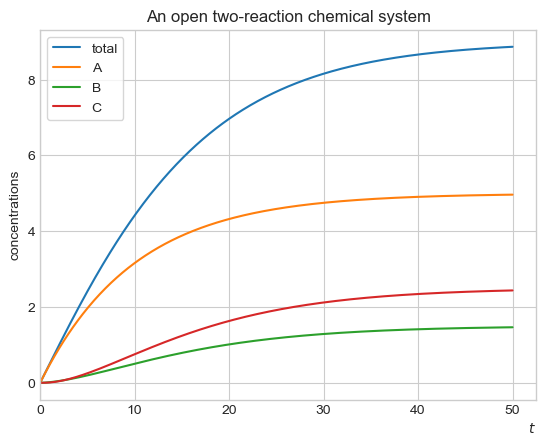

In [38]:
m.solve(tf=50.0, outputs=["total", 'A', 'B', 'C']).plot(xlabel='$t$', ylabel='concentrations');

The iteration of the parameters is now different:

In [39]:
for p in m.parameters:
    print(p.name, p)

kin 0.5
kout 0.2
r1.k 0.1
r2.kr 1.0
r2.kf 2.0


### 2.4 - External variables

An external variable is a parameter that appears in the stoichiometry of a reaction. It is treated as a constant.

In this example, `D` is an external variable:

In [40]:
m = st.read_model("""
title An open two-reaction chemical system

inflow: D -> A, rate = kin * D
r1: A -> B, rate = k * A, k = 0.1
r2: B -> C, rate = kf * B - kr * C, kf = 2, kr = 1
outflow: C -> E, rate = kout * C

D = 1
kin = 0.5
kout = 0.2
E = 2

init: (A = 0, B = 0, C = 0)

~ total = A + B + C
""")
print(m)

An open two-reaction chemical system

Variables: A B C

External variables: D E

inflow:
  reagents: [('D', 1.0)]
  products: [('A', 1.0)]
  stoichiometry: D ->  A
  rate = kin * D

r1:
  reagents: [('A', 1.0)]
  products: [('B', 1.0)]
  stoichiometry: A ->  B
  rate = k * A
  Parameters:
    k = 0.1

r2:
  reagents: [('B', 1.0)]
  products: [('C', 1.0)]
  stoichiometry: B ->  C
  rate = kf * B - kr * C
  Parameters:
    kr = 1
    kf = 2

outflow:
  reagents: [('C', 1.0)]
  products: [('E', 1.0)]
  stoichiometry: C ->  E
  rate = kout * C

total:
  rate = A + B + C

init: (A = 0.0, B = 0.0, C = 0.0)

D = 1
kin = 0.5
kout = 0.2
E = 2

timecourses: {'filenames': []}


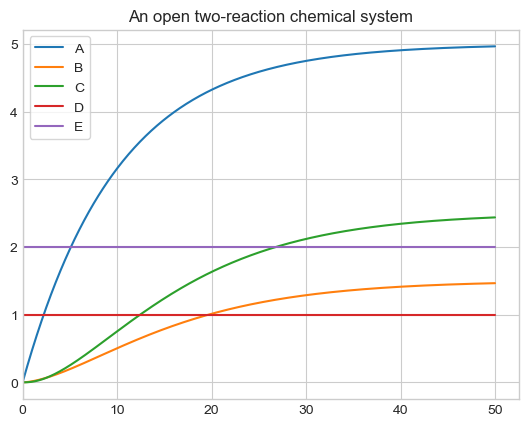

In [41]:
m.solve(tf=50.0, outputs=['A', 'B', 'C', 'D', 'E']).plot();

### 2.5 - Declaration of outputs

You can use `!!` to specify what should go into the solution of the model:

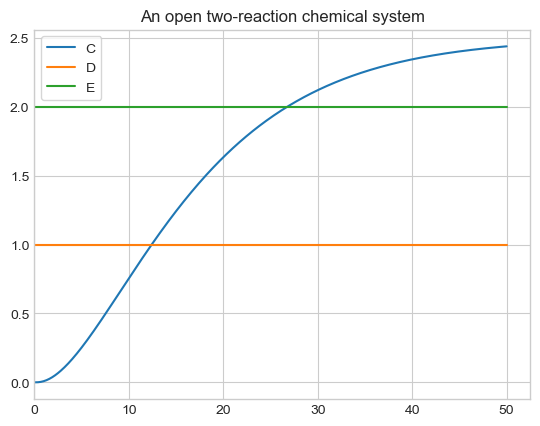

In [42]:
m = st.read_model("""
title An open two-reaction chemical system

inflow: D -> A, rate = kin * D
r1: A -> B, rate = k * A, k = 0.1
r2: B -> C, rate = kf * B - kr * C, kf = 2, kr = 1
outflow: C -> E, rate = kout * C

D = 1
kin = 0.5
kout = 0.2
E = 2

init: (A = 0, B = 0, C = 0)

~ total = A + B + C

!! C D E
""")
m.solve(tf=50.0).plot();

Or use the `outputs` argument to the `solve()` function (in the form of a list of desired outputs):

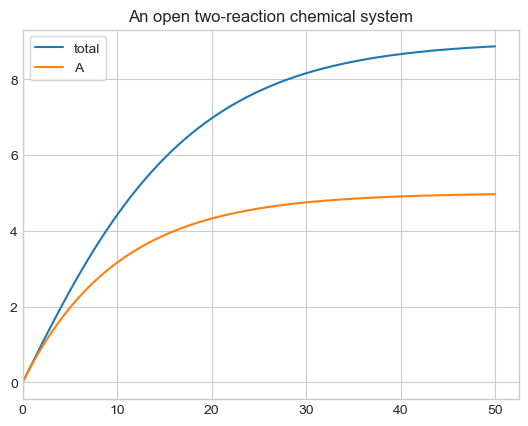

In [43]:
m.solve(tf=50.0, outputs=['total', 'A']).plot();

`->` can be used to specify the values of all the rates of all the processes.

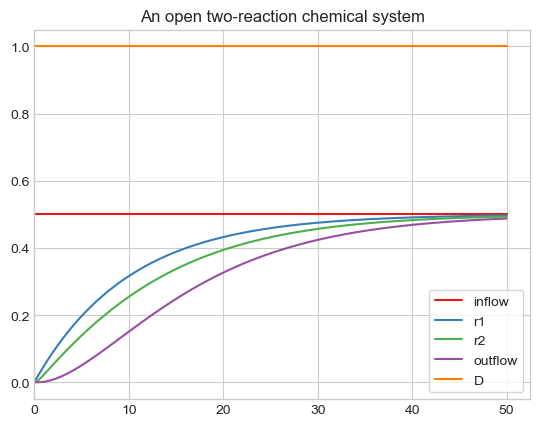

In [44]:
m.solve(tf=50.0, outputs=['->', 'D']).plot(palette='Set1');

### 2.6 - Explicit differential equations

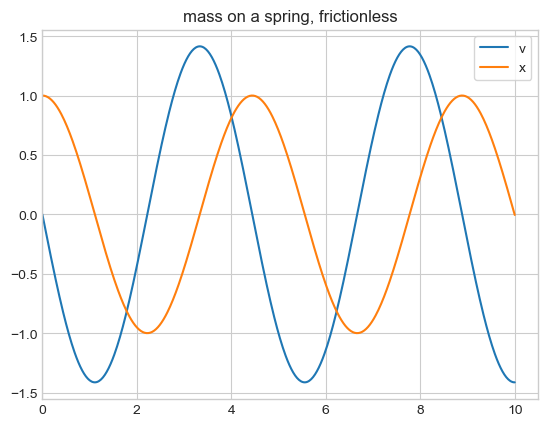

In [48]:
m = st.read_model("""
title mass on a spring, frictionless

# F = m * a = m * v' = - k * x
# by Hooke's law and Newton's law of motion

v' = -(k * x) / m
x' = v

m = 0.5
k = 1

init: x = 1
""")
m.solve(tf=10.0).plot();

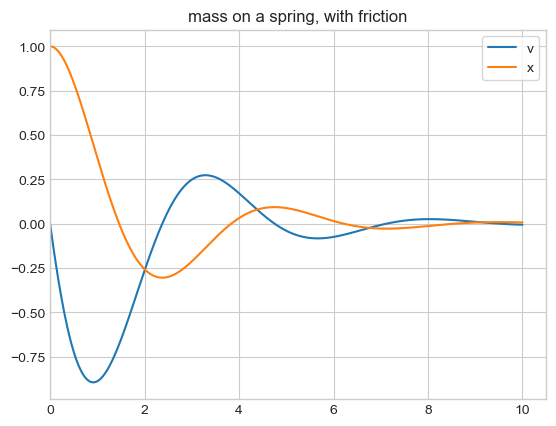

In [49]:
m = st.read_model("""
title mass on a spring, with friction

# using Hooke's law and friction proportional to speed,
# F = m * a = m * v' = - k * x - b * v

v' = (-k*x - b*v) / m
x' = v

m = 0.5
k = 1
b = 0.5

init: x = 1
""")
m.solve(tf=10.0).plot();

### 2.7 - Forcing functions

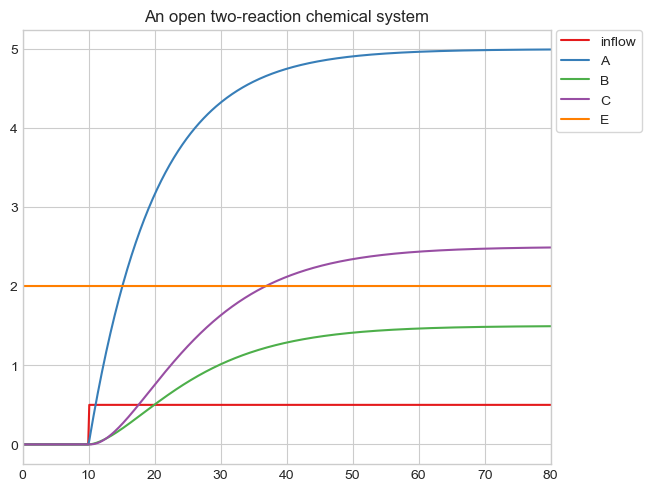

In [56]:
m = st.read_model("""
title An open two-reaction chemical system

inflow: D -> A, rate = kin * D * step(t, 10, 1)
r1: A -> B, rate = k * A, k = 0.1
r2: B -> C, rate = kf * B - kr * C, kf = 2, kr = 1
outflow: C -> E, rate = kout * C

D = 1
kin = 0.5
kout = 0.2
E = 2

init: (A = 0, B = 0, C = 0)

!! inflow A B C E
""")
m.solve(tf=80).plot(palette='Set1', legend='out', xlim=(0, 80));